In [5]:
from utils import Result, results_path, load_base_model, frequencies_to_periods

id = "3375-c3d6-ddb6-2967"
use_attenuation = True
use_anelasticity = Y=True
path = results_path.joinpath(id)
sub_path = path.joinpath("runs").joinpath("anelasticity_" + str(use_anelasticity) + "__attenuation_" + str(use_attenuation))
anelastic_Love_numbers = Result()
anelastic_Love_numbers.load(name="anelastic_Love_numbers", path=sub_path)
omega_values = load_base_model(name="frequencies", path=sub_path)
T_values = frequencies_to_periods(frequencies=omega_values)
elastic_Love_numbers = Result()
elastic_Love_numbers.load(name="elastic_Love_numbers", path=path)
degrees: list[int] = load_base_model(name="degrees", path=path)
degrees_to_plot = [1, 2, 3, 4, 5]
degrees_indices = [degrees.index(degree) for degree in degrees_to_plot]

/tmp/ipykernel_545284/915057764.py:10: RuntimeWarning: invalid value encountered in divide
  h_ratio = anelastic_values / elastic_value


array([-0.07089802, -0.06572074, -0.0534235 , -0.03145213,  0.00068978,
        0.01995085,  0.03921191,  0.05806353,  0.07691515,  0.09315235,
        0.10735989,  0.11775759,  0.12815528,  0.13441662,  0.14067796,
        0.14385865,  0.14749371,  0.15050727,  0.15074053,  0.15097378,
        0.15052713,  0.15008048,  0.149519  ,  0.14902771,  0.14889452,
        0.14883745,  0.14876134,  0.1489445 ,  0.14918871,  0.14943293,
        0.14961609,  0.15001351,  0.15031158,  0.15070901,  0.15110644,
        0.15136337,  0.15170594,  0.15196287,  0.15230544,  0.15236812,
        0.1524517 ,  0.15259796,  0.1522722 ,  0.15194644,  0.15061157,
        0.14888044,  0.14697655,  0.14505059,  0.14319145,  0.14144422,
        0.13982715,  0.13834333,  0.1369882 ,  0.13575362,  0.13463006,
        0.13360785,  0.1326777 ,  0.13183089,  0.13105955,  0.13035646,
        0.12971515,  0.1291298 ,  0.12859515,  0.12810653,  0.12765971,
        0.12725089,  0.12687663,  0.12653387,  0.12621975,  0.12

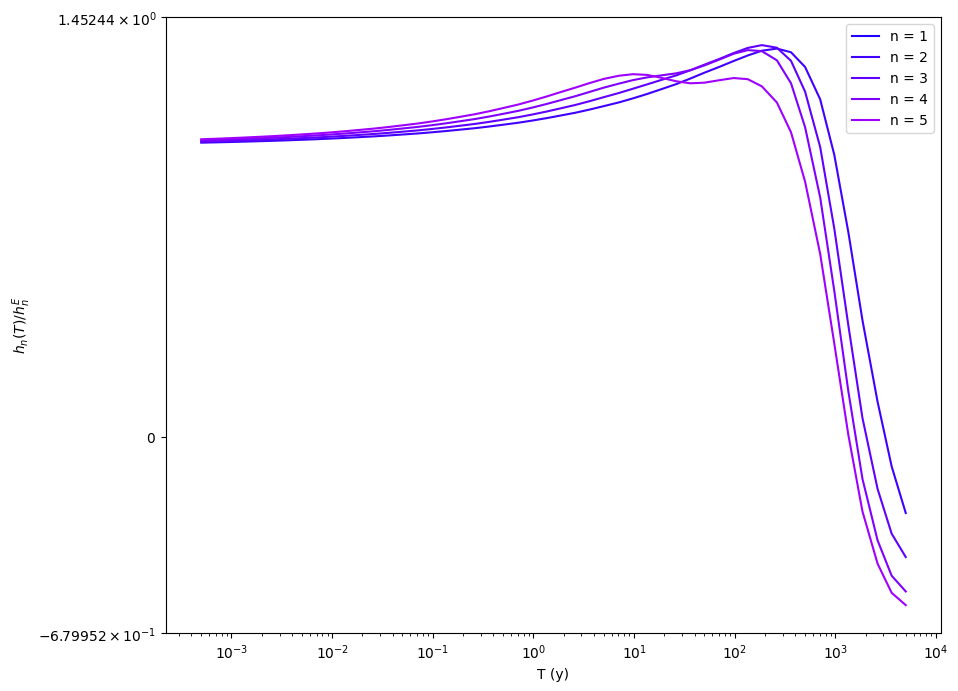

In [6]:
import matplotlib.pyplot as plt
from utils import Direction, BoundaryCondition
from numpy import real

plt.figure(figsize=(10, 8))
for i_degree, degree in zip(degrees_indices, degrees_to_plot):
    color = ((i_degree + 1.0) / 8.0, 0.0, 1.0)
    elastic_value = real(elastic_Love_numbers.values[Direction.potential][BoundaryCondition.potential][i_degree][0])
    anelastic_values = real(anelastic_Love_numbers.values[Direction.potential][BoundaryCondition.potential][i_degree])
    h_ratio = anelastic_values / elastic_value
    plt.plot(T_values, h_ratio, label="n = " + str(degree), color=color)
    plt.xscale("log")
    plt.yscale("symlog")
    plt.legend()
plt.xlabel("T (y)")
plt.ylabel("$ h_n(T) / h_n^E$")
anelastic_values

In [3]:
from utils import real_descriptions_path, RealDescription, Integration, Earth_radius

options_list = [[True, False], [False, True], [True, True]]
integrations: dict[tuple[bool, bool], Integration] = {}
real_description = RealDescription(
    id=id,
    below_ICB_layers=1,
    below_CMB_layers=2,
    splines_degree=1,
    radius_unit=Earth_radius,
    real_crust=False,
    n_splines_base=4,
    profile_precision=100,
    radius=Earth_radius,
)
real_description.load(path=real_descriptions_path)

for attenuation, anelasticity in options_list:
    integrations[attenuation, anelasticity] = Integration(
        real_description=real_description, log_omega=0.0, use_anelasticity=anelasticity, use_attenuation=attenuation
    )

In [4]:
from numpy import linspace
for layer in integrations[True, False].description_layers:
    x=linspace(start=layer.x_inf, stop=layer.x_sup, num=100)
    layer.evaluate(x=x, variable="m"), 

KeyError: 'm'